In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
df = pd.read_csv(r"C:\Users\jaswi\Downloads\Bus_Lanescleaned.csv")

In [3]:
df.head()

,OBJECTID,FEATURE_ID,OPERATIONAL,LENGTH,DIRECTION,CARRIAGEWAY,ROAD_NAME,BOROUGH,WEEK_DAYS,SATURDAY,SUNDAY,EVENT_DAYS,VEHICLES,ROUTE,LANE_TYPE,ROADTYPE,YEAR_REMOVED,DATASET_LAST_UPDATED,Shape__Length
0,50152,af73426d-82f5-49ad-b6d3-c049f05f7df5,Live,190,South,Nearside,Amersham Road,Transport for London,24 Hours (All Day),24 Hours (All Day),24 Hours (All Day),Not Applicable,"Bus, Cycle, Motorcycle and Taxi","21, 136, 171, 172, 321, 436, N21, N136, N171",Not Applicable,TLRN,unknown,2024/08/13 00:00:00+00,190.371572
1,50153,ee56d193-b8c5-49ee-9fa9-bc57fe29fac7,Live,128,South West,Nearside,Balham High Road,Transport for London,24 Hours (All Day),24 Hours (All Day),24 Hours (All Day),Not Applicable,"Bus, Cycle, Motorcycle and Taxi","155, 249, 355, N155, UL41",Not Applicable,TLRN,unknown,2024/08/13 00:00:00+00,127.972715
2,50154,e16579de-c52e-4c52-983c-164a3703a797,Live,200,North,Nearside,Commonside West,Merton,07:00-10:00,07:00-10:00,Not in Operation,Not Applicable,"Bus, Cycle, Motorcycle and Taxi","264, 270, 355",Not Applicable,Borough,unknown,2024/08/13 00:00:00+00,199.578746
3,50155,924c1048-b37f-486f-b116-7865555883c4,Live,115,North,Nearside,High Road,Transport for London,24 Hours (All Day),24 Hours (All Day),24 Hours (All Day),Not Applicable,"Bus, Cycle, Motorcycle and Taxi","67, 76, 149, 243, 349, 476, N73",Not Applicable,TLRN,unknown,2024/08/13 00:00:00+00,114.654692
4,50156,4e25792c-ab59-4c24-9c94-0463308ae093,Live,301,North West,Nearside,Holloway Road,Transport for London,24 Hours (All Day),24 Hours (All Day),24 Hours (All Day),Not Applicable,"Bus, Cycle, Motorcycle and Taxi","21, 43, 153, 263, 393, N41, N271, UL21, UL42, ...",Not Applicable,TLRN,unknown,2024/08/13 00:00:00+00,301.293759


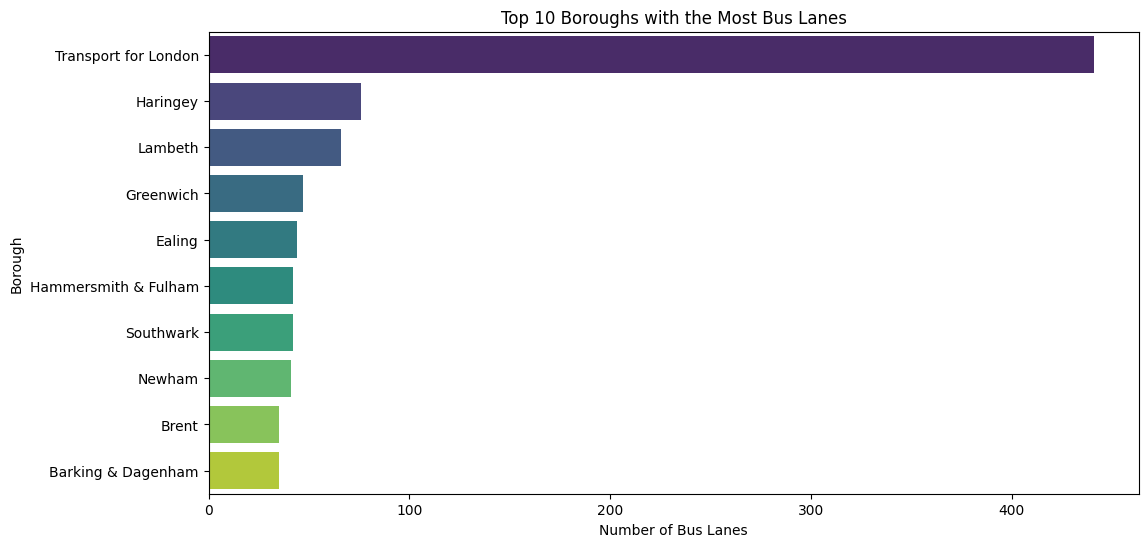

In [4]:
top_boroughs = df["BOROUGH"].value_counts().head(10).reset_index()
top_boroughs.columns = ["BOROUGH", "COUNT"]

plt.figure(figsize=(12, 6))
sns.barplot(x="COUNT", y="BOROUGH", hue="BOROUGH", data=top_boroughs, palette="viridis", dodge=False)
plt.xlabel("Number of Bus Lanes")
plt.ylabel("Borough")
plt.title("Top 10 Boroughs with the Most Bus Lanes")
plt.show()

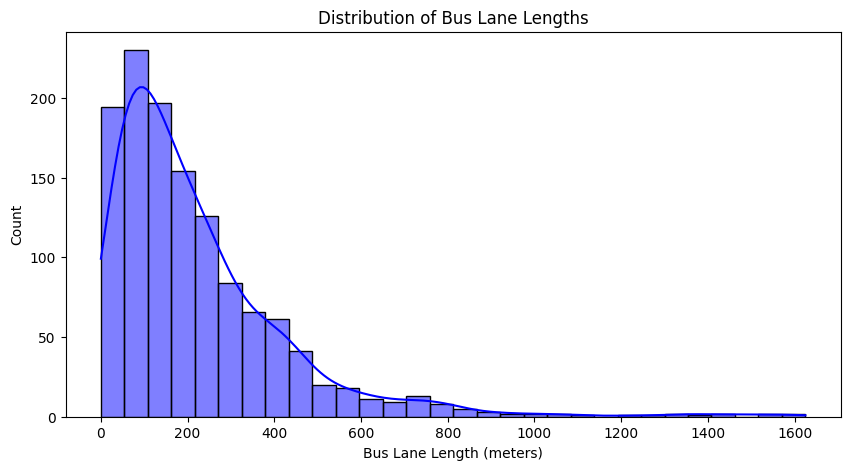

In [5]:
# Visualization: Distribution of bus lane lengths
plt.figure(figsize=(10, 5))
sns.histplot(df["LENGTH"], bins=30, kde=True, color="blue")
plt.xlabel("Bus Lane Length (meters)")
plt.ylabel("Count")
plt.title("Distribution of Bus Lane Lengths")
plt.show()

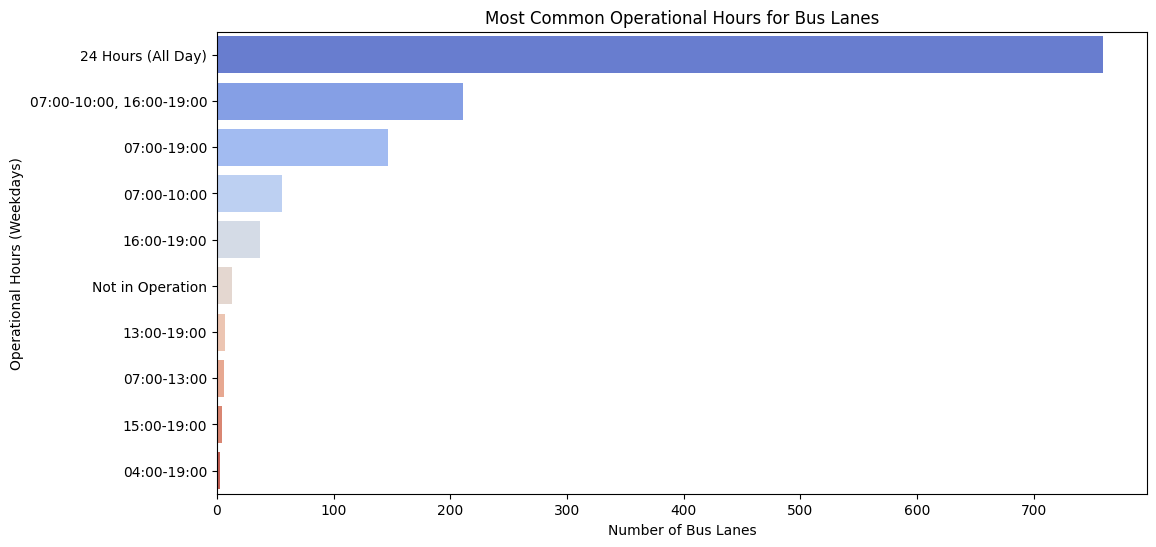

In [6]:
operational_hours = df["WEEK_DAYS"].value_counts().head(10).reset_index()
operational_hours.columns = ["WEEK_DAYS", "COUNT"]

plt.figure(figsize=(12, 6))
sns.barplot(x="COUNT", y="WEEK_DAYS", hue="WEEK_DAYS", data=operational_hours, palette="coolwarm", dodge=False)
plt.xlabel("Number of Bus Lanes")
plt.ylabel("Operational Hours (Weekdays)")
plt.title("Most Common Operational Hours for Bus Lanes")
plt.show()


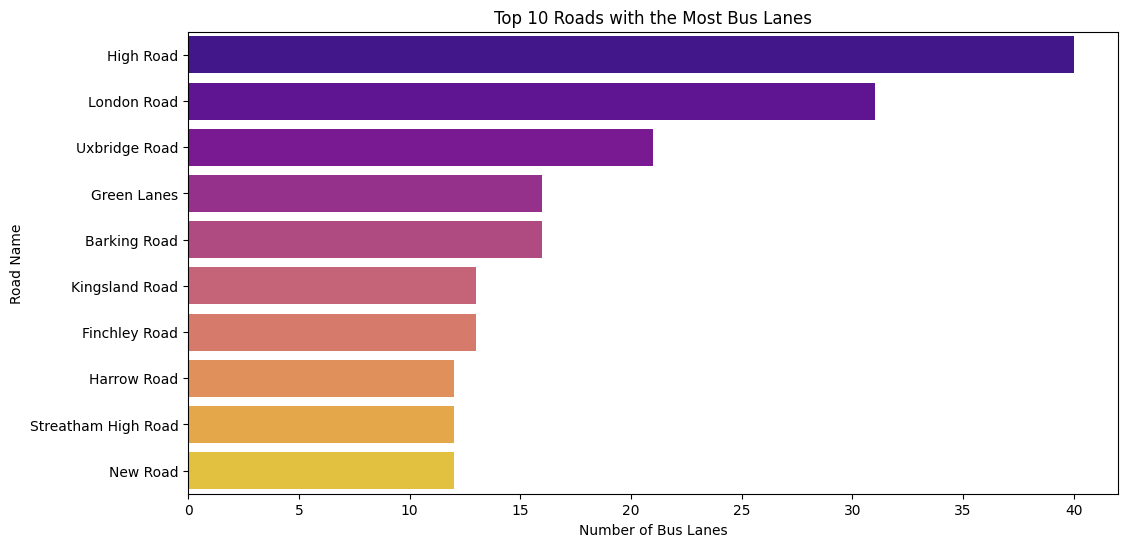

In [7]:
top_roads = df["ROAD_NAME"].value_counts().head(10).reset_index()
top_roads.columns = ["ROAD_NAME", "Count"]

plt.figure(figsize=(12, 6))
sns.barplot(x="Count", y="ROAD_NAME", hue="ROAD_NAME", data=top_roads, palette="plasma", dodge=False)
plt.xlabel("Number of Bus Lanes")
plt.ylabel("Road Name")
plt.title("Top 10 Roads with the Most Bus Lanes")
plt.show()

<Figure size 1400x800 with 0 Axes>

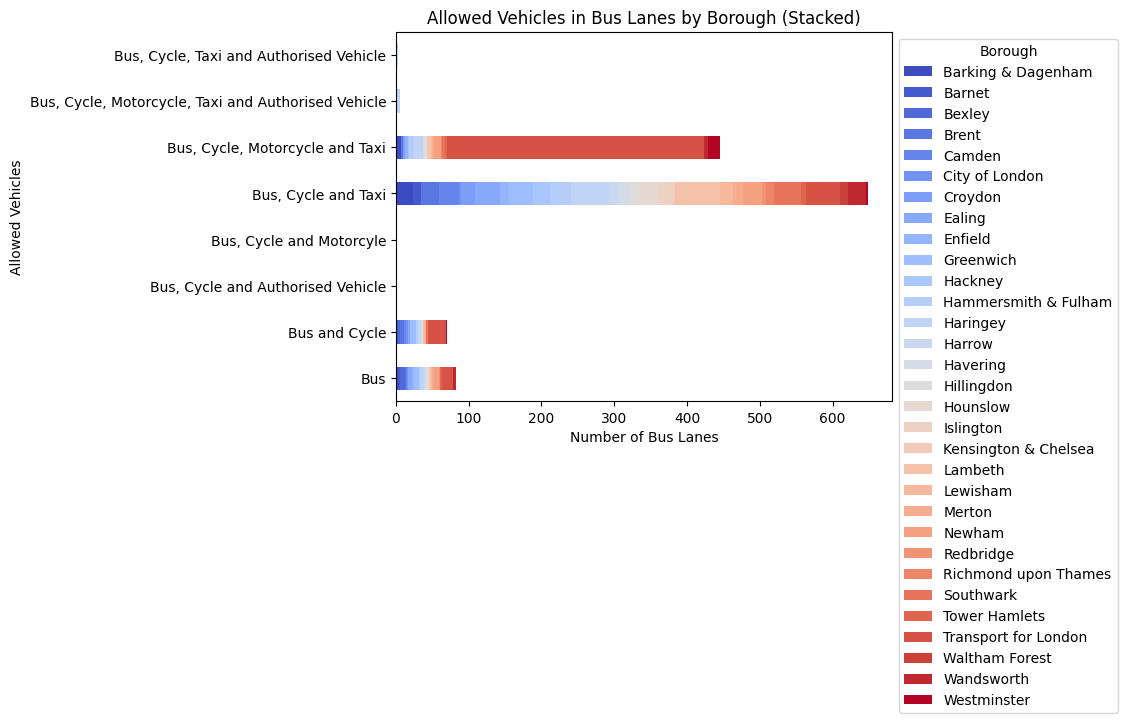

In [8]:
# Grouping and plotting
df_grouped = df.groupby(["VEHICLES", "BOROUGH"]).size().unstack().fillna(0)

plt.figure(figsize=(14, 8))
df_grouped.plot(kind="barh", stacked=True, colormap="coolwarm")
plt.xlabel("Number of Bus Lanes")
plt.ylabel("Allowed Vehicles")
plt.title("Allowed Vehicles in Bus Lanes by Borough (Stacked)")
plt.legend(title="Borough", bbox_to_anchor=(1, 1))
plt.show()

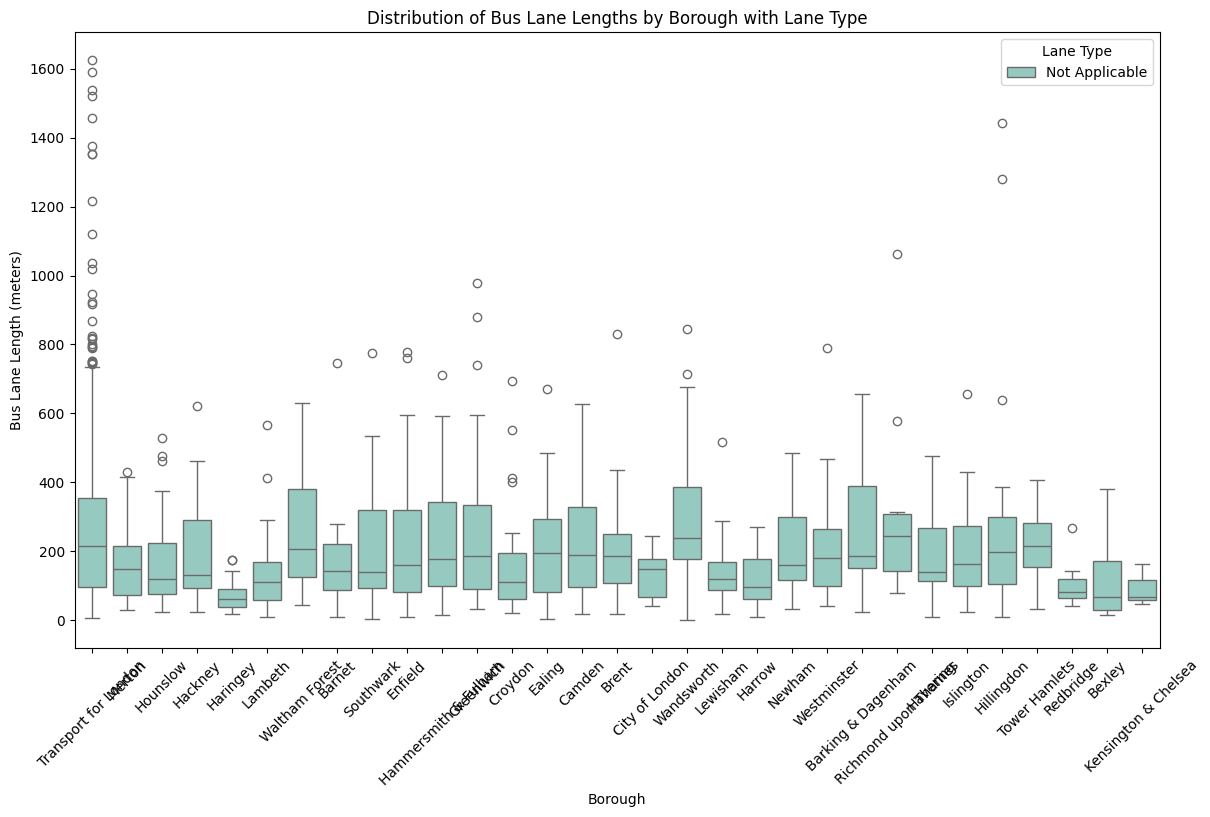

In [9]:
plt.figure(figsize=(14, 8))
sns.boxplot(x="BOROUGH", y="LENGTH", hue="LANE_TYPE", data=df, palette="Set3")
plt.xticks(rotation=45)
plt.xlabel("Borough")
plt.ylabel("Bus Lane Length (meters)")
plt.title("Distribution of Bus Lane Lengths by Borough with Lane Type")
plt.legend(title="Lane Type")  # Adjust legend title
plt.show()
